SAM-2
===

 * Paper: https://arxiv.org/abs/2408.00714

![SAM-2 overview](../assets/sam2-overview.png)

```bash
pip install torch torchvision
pip install matplotlib
pip install supervision
```

```bash
git clone https://github.com/facebookresearch/sam2.git && cd sam2
# installation without CUDA
SAM2_BUILD_CUDA=0 pip install -e ".[notebooks]"
````

In [ ]:
import os
import numpy as np
from PIL import Image
import supervision as sv
import matplotlib.pyplot as plt
import torch
import torchvision

from sam2.sam2_image_predictor import SAM2ImagePredictor

predictor = SAM2ImagePredictor.from_pretrained(
    "facebook/sam2-hiera-large"
)

In [8]:
image_path = "../samples/plants.jpg"
image = Image.open(image_path).convert("RGB")
input_points = np.array([(650, 200)])

with torch.inference_mode():
    predictor.set_image(image)
    masks, scores, raw_logits = predictor.predict(
        point_coords=input_points,
        point_labels=[1],
    )

print("masks:", masks.shape)
print("scores:", scores.shape)
print("raw_logits:", raw_logits.shape)

masks: (3, 1137, 1068)
scores: (3,)
raw_logits: (3, 256, 256)


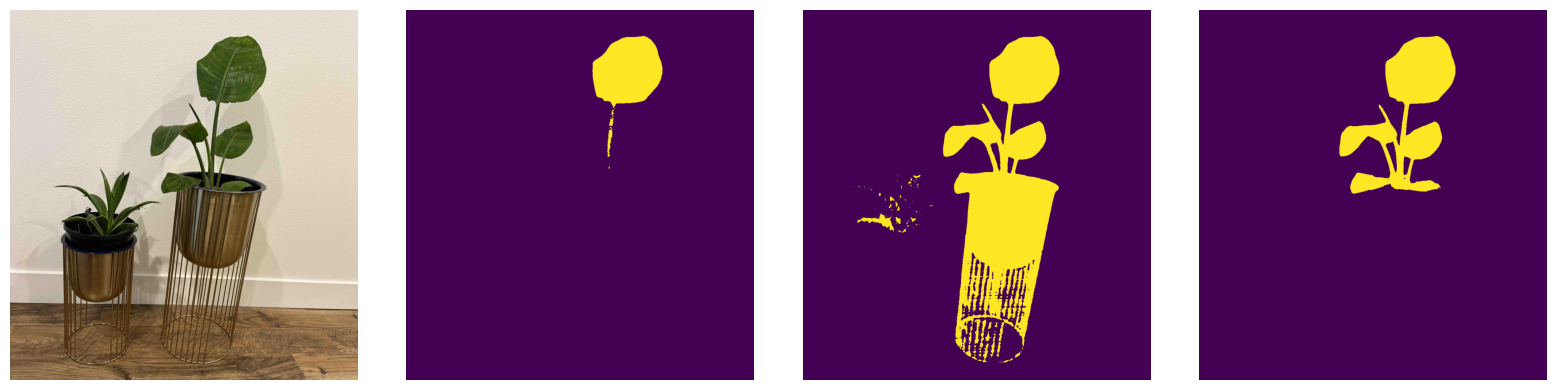

In [9]:
n = len(masks)
fig, axes = plt.subplots(1, n + 1, figsize=(4 * (n + 1), 4))

axes[0].imshow(image)
for i in range(n):
    axes[i + 1].imshow(masks[i])
[ax.axis("off") for ax in axes]
plt.tight_layout()
plt.show()